## Spam classification using Naive Bayes in ML

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer      # BOW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import joblib
print('All necessary library are imported !')

# SOME NLP NECESSARY LIBRARY
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer     # STEMMING

All necessary library are imported !


In [2]:
x , y = [],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data = file.read()
    for data_item in data.split('\n') :
        if len(data_item.split('\t')) == 2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print('Successfully read the data from text file and splitted into X and Y')


Successfully read the data from text file and splitted into X and Y


In [3]:
len(x),len(y)


(5574, 5574)

In [4]:
# preparing a dataframe from our read data.

data_dict = {'mail_message':x,'label':y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
for i in range(0,len(df)):
    mesage = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    mesage = mesage.lower()
    df['mail_message'][i] = mesage
df.head(10)
#Text cleaning processing and lowerizing the 

C:\Users\harsh\AppData\Local\Temp\ipykernel_28364\4042817555.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i] = mesage


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


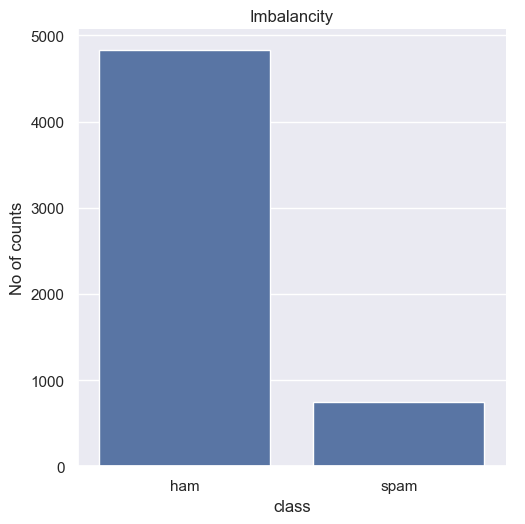

In [7]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()

In [8]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [9]:
df.sample(2000)

,mail_message,label
5133,that sucks i ll go over so u can do my hair ...,ham
3389,same as kallis dismissial in nd test,ham
1586,i was wondering if it would be okay for you to...,ham
2398,neshanth tel me who r u,ham
719,you have won a guaranteed cash or a ...,spam
...,...,...
4675,i m leaving my house now,ham
4337,fyi i m taking a quick shower be at epsilon i...,ham
1904,free entry in a weekly comp for a chance to ...,spam
4227,ok thats cool its just off either raglan rd...,ham


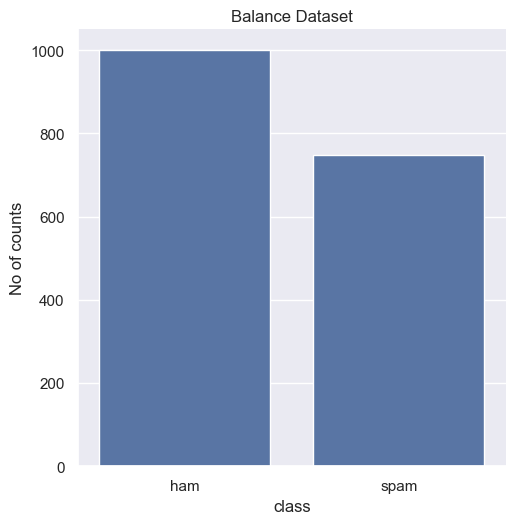

In [10]:
#filtering the dataset
ham = df[df['label']=='ham'].sample(1000)
spam = df[df['label']=='spam']

#concating the dataset
balance_df = pd.concat([ham,spam])

#visualaizing the datset
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Balance Dataset')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()


In [11]:
#label encoding of our Dependent variable
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})

In [12]:
#checking the missing value
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [13]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset before remove Duplicates :- {balance_df.shape}")


Duplicates in our dataset are :- 140
Shape of our Dataset before remove Duplicates :- (1747, 2)


In [14]:
balance_df.drop_duplicates(inplace=True)
# Duplicates are removed

In [15]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset after remove Duplicates :- {balance_df.shape}")

Duplicates in our dataset are :- 0
Shape of our Dataset after remove Duplicates :- (1607, 2)


In [16]:
# Splitted The Data into X and Y
x = balance_df['mail_message']
y = balance_df['label']

In [17]:
x.head()

3328                  what number do u live at  is it    
3287                not to worry  i m sure you ll get it 
3799    feb   lt   gt   is  i love u  day  send dis to...
3853         no  its true  k do u knw dis no   lt   gt   
489     depends on quality  if you want the type i sen...
Name: mail_message, dtype: object

In [18]:
y.head()

3328    0
3287    0
3799    0
3853    0
489     0
Name: label, dtype: int64

In [19]:
# prepares single list a of mails
x = x.values
x[0:5]


array([' what number do u live at  is it    ',
       'not to worry  i m sure you ll get it ',
       'feb   lt   gt   is  i love u  day  send dis to all ur  valued frnds  evn me  if   comes back u ll gt married d person u luv  if u ignore dis u will lose ur luv   evr',
       'no  its true  k do u knw dis no   lt   gt   ',
       'depends on quality  if you want the type i sent boye  faded glory  then about    if you want ralphs maybe  '],
      dtype=object)

In [20]:
x.shape

(1607,)

In [21]:
# intialaizing the bag of word class class
BOW_obj = CountVectorizer(max_features=2000,stop_words='english')


In [22]:
x.shape,type(x)

((1607,), numpy.ndarray)

In [23]:
x_transformed = BOW_obj.fit_transform(x)

In [24]:
x_transformed

<1607x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12636 stored elements in Compressed Sparse Row format>

In [25]:
#sparse metrix converted to dense metrix .
dense_matrix = x_transformed.toarray()
dense_matrix.shape


(1607, 2000)

In [26]:
# checking the shape of the data before splitting into training and testing
x = dense_matrix
x.shape,y.shape

((1607, 2000), (1607,))

In [27]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
#multinominal
MNB  = MultinomialNB()

In [29]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [30]:
MNB.score(x_train,y_train)

0.9766536964980544

In [31]:
MNB.score(x_test,y_test)    

0.9751552795031055

In [32]:
pred = MNB.predict(x_test)

In [33]:
confusion_matrix(y_test,pred)

array([[199,   2],
       [  6, 115]], dtype=int64)

<Axes: >

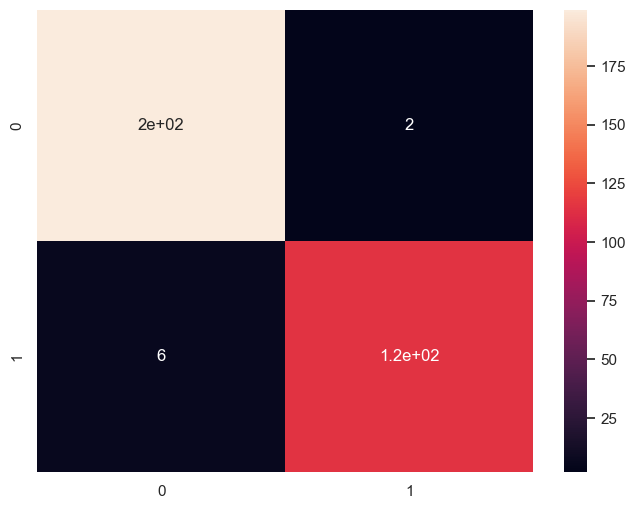

In [34]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [35]:
#classification report 
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       201
           1       0.98      0.95      0.97       121

    accuracy                           0.98       322
   macro avg       0.98      0.97      0.97       322
weighted avg       0.98      0.98      0.98       322



In [36]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))   #pkl is the extention for pickel 

In [37]:
pickle.dump(MNB,open('spamclassifier_MnB.pkl','wb'))        # to save the model


In [38]:
model=pickle.load(open('spamclassifier_MnB.pkl','rb'))            # to load the model


In [39]:
compare_dict = {'actual':y_test,'pred':pred}
comparison_df = pd.DataFrame(compare_dict)
comparison_df.head(30)

,actual,pred
4831,0,0
4218,0,0
5225,0,0
211,0,0
2172,0,0
317,0,0
1046,0,0
4558,0,0
2089,1,1
2179,0,0
